- [ ] Test-hists
    - [ ] For each sample size, build a histogram of all the distributions for MCM digit 0 seeing each other digit
        - [ ] > that is the smoothed test-probability
    - [ ] Do twice for sample size 10, so we can see how different the plots are ( just next to each other)
    - [ ] Do once per sample size
    - [ ] Expect that distribution of pixel 0 will move further to the left
    - [ ] Do for 100,500,1000,2000 -> see if after there is any change
    - [ ] Fit on train set, test on test set


In [1]:
# load full mcms
# get probability distribution over test data for MCM 0 for all digits
# do this for different sample sizes

In [2]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage

sys.path.append("../")
import src.plot as myplot
import seaborn as sns

import sklearn

In [25]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [4]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

In [5]:
sample_sizes = [10, 100, 3000, 2000]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../Output/sample_sizes_fromfull")


In [6]:

def dfs(x, lens=[]):
    lens.append(len(x))
    if isinstance(x[0], list) or isinstance(x[0], np.ndarray):
        dfs(x[0], lens)
    return lens

dfs(mcms_samplesizes)

[4, 51, 10, 45]

In [7]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

In [8]:



n_runs = 1
mcm_digit = 0

nr_digits = 10

test_probs = np.zeros((len(sample_sizes), n_runs,nr_digits, len(utils.load_test_data(digit=0))))

for test_digit in range(nr_digits):
    test_data = utils.load_test_data(digit=test_digit)

    for sample_size_idx, sample_size in enumerate(sample_sizes):

        mcms = mcms_samplesizes[sample_size_idx][:n_runs]
        counts_gstar = counts_samplesizes[sample_size_idx][:n_runs]
            
        for run_idx, mcm in enumerate(mcms):
            test_probs[sample_size_idx][run_idx][test_digit] = utils.probabilities_gstar(mcm[mcm_digit], counts_gstar[run_idx][mcm_digit], test_data, sample_size,smooth=True)


In [31]:
test_probs[0]

(4, 10, 892)

(0.0, 2.1461353868341436e-10)

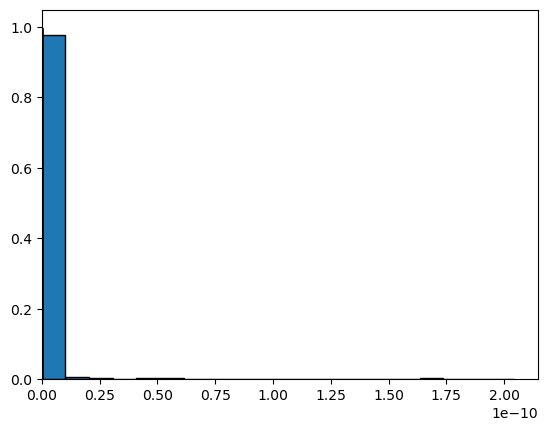

In [24]:
data = np.swapaxes(test_probs[3,0],0,1)

fig, ax = plt.subplots()

for i in range(10):  
    myplot.bar_hist(ax, data[:,i])

plt.xlim((0))
